Anecdotally, it seems like SGA is scoring a remarkably consistent number of PPG over the last 2 years, since he became a high-volume scorer. I aim to find out a) whether this is broadly true, b) whether we can divine his 'plan'. Is he trying to get 30 a game? Is his per-minute scoring just as consistent? My pet theory is that he is on the same gameplan as late-stage LeBron: get your target (25/30) every game and don't extend much beyond that.

For a), I will look first look at PPG: 1) the standard deviation and coefficient of variation for SGA's PPG the last 2 years compared to other high-volume scorers; 2) the distribution of points in each game compared to player's season average for SGA vs other high volume scorers

First, get the league leaders for points the last two years, and select those above 25 PPG

In [52]:
"""get the players w/ppg > 25"""
from nba_api.stats.endpoints import leagueleaders
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame', season='2022-23').get_data_frames()[0]
scorers_2223 = league_leaders[league_leaders['PTS'] > 25][['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame', season='2023-24').get_data_frames()[0]
scorers_2324 = league_leaders[league_leaders['PTS'] > 25][['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]

In [53]:
scorers_2223.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,GP,MIN,PTS
0,203954,1,Joel Embiid,1610612755,66,34.6,33.1
1,1629029,2,Luka Doncic,1610612742,66,36.2,32.4
2,203081,3,Damian Lillard,1610612757,58,36.3,32.2
3,1628983,4,Shai Gilgeous-Alexander,1610612760,68,35.5,31.4
4,203507,5,Giannis Antetokounmpo,1610612749,63,32.1,31.1


In [54]:
"""loop to get ID, name, ppg, std, cv for each scorer in a dict"""
scorers_dict_2223 = {}
from nba_api.stats.endpoints import playergamelog
for scorer in scorers_2223.index:
    id = scorers_2223.loc[scorer, 'PLAYER_ID'].item()
    name = scorers_2223.loc[scorer, 'PLAYER']
    gamelog = playergamelog.PlayerGameLog(player_id=id, season='2022-23').get_data_frames()[0]
    ppg = gamelog['PTS'].mean()
    std = gamelog['PTS'].std()
    cv = std/ppg

    scorers_dict_2223.update({f"{name}": [id, ppg, std, cv]})
del(cv, id, name, gamelog, ppg, scorer, std)

scorers_dict_2324 = {}
from nba_api.stats.endpoints import playergamelog
for scorer in scorers_2324.index:
    id = scorers_2324.loc[scorer, 'PLAYER_ID'].item()
    name = scorers_2324.loc[scorer, 'PLAYER']
    gamelog = playergamelog.PlayerGameLog(player_id=id, season='2023-24').get_data_frames()[0]
    ppg = gamelog['PTS'].mean()
    std = gamelog['PTS'].std()
    cv = std/ppg

    scorers_dict_2324.update({f"{name}": [id, ppg, std, cv]})
del(cv, id, name, gamelog, ppg, scorer, std)

In [100]:
print(scorers_dict_2223)

{'Joel Embiid': [203954, 33.07575757575758, 8.847964748261612, 0.2675060345328751], 'Luka Doncic': [1629029, 32.39393939393939, 9.764738427122177, 0.30143720121144235], 'Damian Lillard': [203081, 32.172413793103445, 10.59151916780174, 0.3292112067162385], 'Shai Gilgeous-Alexander': [1628983, 31.397058823529413, 6.725180363518979, 0.21419778206992532], 'Giannis Antetokounmpo': [203507, 31.095238095238095, 10.735401619234711, 0.34524262481459256], 'Jayson Tatum': [1628369, 30.06756756756757, 8.477740525233141, 0.28195631409764155], 'Donovan Mitchell': [1628378, 28.264705882352942, 11.389465736501863, 0.40295716445480056], 'Kyrie Irving': [202681, 27.05, 8.129096099187812, 0.3005211127241335], 'Jaylen Brown': [1627759, 26.62686567164179, 7.444411816917728, 0.27958273079231377], 'Trae Young': [1629027, 26.21917808219178, 7.4147873561748705, 0.28280014472349296], 'Ja Morant': [1629630, 26.16393442622951, 8.321018222687359, 0.31803390450120855], 'Lauri Markkanen': [1628374, 25.62121212121212

In [56]:
"""turn the dict into a df"""
import pandas as pd
headers = ['name', 'player_id', 'ppg', 'std', 'cv']
scorers_summary_2223 = pd.DataFrame([[k] + v for k,v in scorers_dict_2223.items()], columns=headers)
scorers_summary_2223['year'] = '2022-23'

scorers_summary_2324 = pd.DataFrame([[k] + v for k,v in scorers_dict_2324.items()], columns=headers)
scorers_summary_2324['year'] = '2023-24'

"combine the dfs into one and arrange for presentation"
scorers_summary = pd.concat([scorers_summary_2223, scorers_summary_2324]).reset_index(drop=True)
#del(headers, league_leaders, scorers_2223, scorers_2324, scorers_dict_2223, scorers_dict_2324, scorers_summary_2223, scorers_summary_2324)

scorers_summary = scorers_summary.drop('player_id', axis=1)
scorers_summary = scorers_summary.reindex(columns=['name', 'year', 'ppg', 'std', 'cv'])

In [57]:
scorers_summary

,name,year,ppg,std,cv
0,Joel Embiid,2022-23,33.075758,8.847965,0.267506
1,Luka Doncic,2022-23,32.393939,9.764738,0.301437
2,Damian Lillard,2022-23,32.172414,10.591519,0.329211
3,Shai Gilgeous-Alexander,2022-23,31.397059,6.725180,0.214198
4,Giannis Antetokounmpo,2022-23,31.095238,10.735402,0.345243
5,Jayson Tatum,2022-23,30.067568,8.477741,0.281956
6,Donovan Mitchell,2022-23,28.264706,11.389466,0.402957
7,Kyrie Irving,2022-23,27.050000,8.129096,0.300521
8,Jaylen Brown,2022-23,26.626866,7.444412,0.279583
9,Trae Young,2022-23,26.219178,7.414787,0.282800


In [74]:
round(scorers_summary.sort_values(by=['std']), 2)

,name,year,ppg,std,cv
25,LeBron James,2023-24,25.66,6.66,0.26
3,Shai Gilgeous-Alexander,2022-23,31.40,6.73,0.21
15,Shai Gilgeous-Alexander,2023-24,30.05,6.97,0.23
19,Jayson Tatum,2023-24,26.85,7.04,0.26
9,Trae Young,2022-23,26.22,7.41,0.28
17,Kevin Durant,2023-24,27.09,7.43,0.27
8,Jaylen Brown,2022-23,26.63,7.44,0.28
11,Lauri Markkanen,2022-23,25.62,7.51,0.29
26,Kyrie Irving,2023-24,25.64,7.84,0.31
7,Kyrie Irving,2022-23,27.05,8.13,0.30


In [76]:
round(scorers_summary.sort_values(by=['cv']), 2)

,name,year,ppg,std,cv
3,Shai Gilgeous-Alexander,2022-23,31.40,6.73,0.21
15,Shai Gilgeous-Alexander,2023-24,30.05,6.97,0.23
25,LeBron James,2023-24,25.66,6.66,0.26
13,Luka Doncic,2023-24,33.86,8.81,0.26
19,Jayson Tatum,2023-24,26.85,7.04,0.26
0,Joel Embiid,2022-23,33.08,8.85,0.27
17,Kevin Durant,2023-24,27.09,7.43,0.27
8,Jaylen Brown,2022-23,26.63,7.44,0.28
5,Jayson Tatum,2022-23,30.07,8.48,0.28
9,Trae Young,2022-23,26.22,7.41,0.28


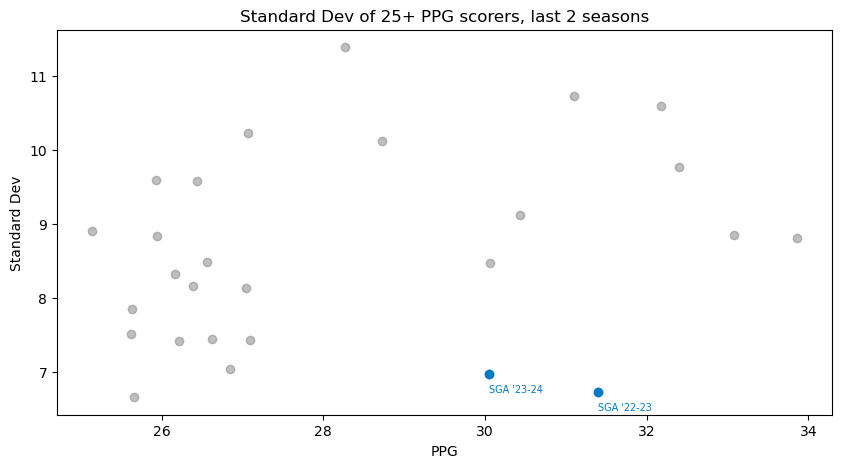

'need to change the backdrop'

In [62]:
"""scatterplots"""
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(x='ppg', y='std', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item(),
            data=scorers_summary, color='#007AC1')
plt.annotate("SGA '22-23", xy=(scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
                        scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item()),
             xytext=(scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
                     scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item()-.25),
             color='#007AC1', fontsize=7)
plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['std'].item(),
            data=scorers_summary, color='#007AC1')
plt.annotate("SGA '23-24", xy=(scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
                        scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['std'].item()),
             xytext=(scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
                     scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['std'].item()-.25),
             color='#007AC1', fontsize=7)

plt.xlabel("PPG")
plt.ylabel("Standard Dev")
plt.title("Standard Dev of 25+ PPG scorers, last 2 seasons")
plt.show()
"""need to change the backdrop"""

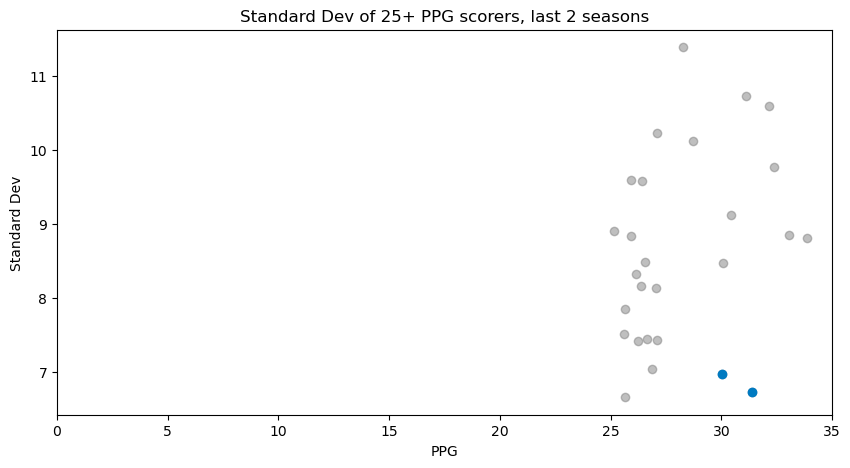

"need to change the backdrop, and probably include every scorer's details (not just >25 PPG)"

In [68]:
"""scatterplots"""
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(x='ppg', y='std', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item(),
            data=scorers_summary, color='#007AC1')
plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['std'].item(),
            data=scorers_summary, color='#007AC1')

plt.xlim(0,35)
plt.xlabel("PPG")
plt.ylabel("Standard Dev")
plt.title("Standard Dev of 25+ PPG scorers, last 2 seasons")
plt.show()
"""need to change the backdrop, and probably include every scorer's details (not just >25 PPG)"""

The following rehashes some previous code but will yield the correct chart.

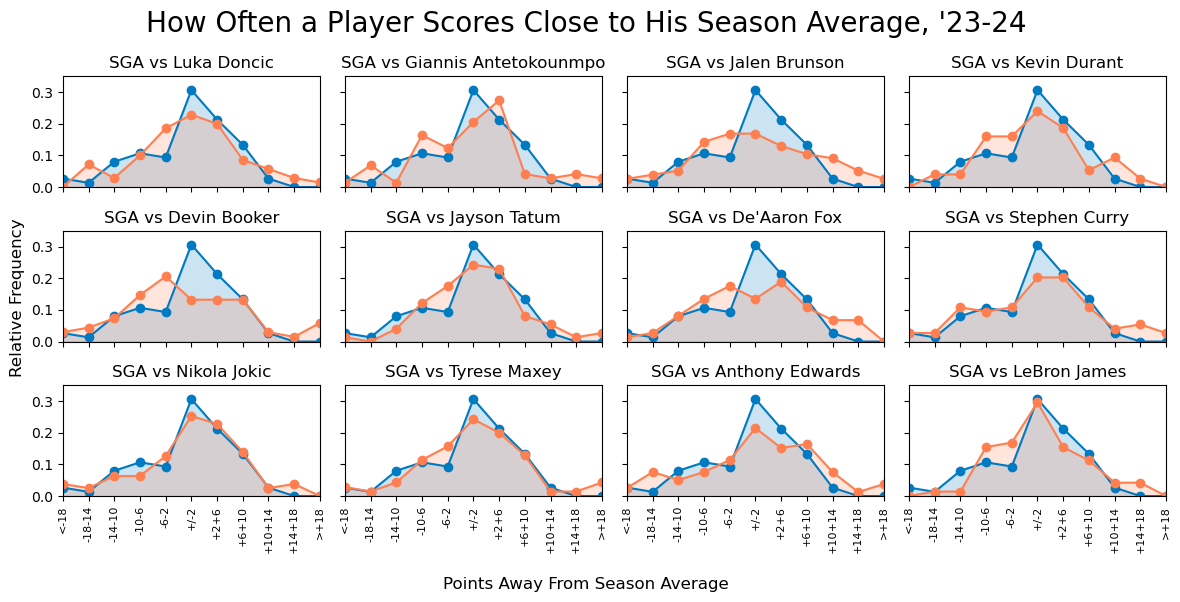

In [94]:
"""get the players w/ppg > 25"""
from nba_api.stats.endpoints import leagueleaders
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame').get_data_frames()[0]
scorers = league_leaders[league_leaders['PTS'] > 25][['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]

"""get shai log and make his distribution"""
shai_ID = scorers[scorers['PLAYER'] == 'Shai Gilgeous-Alexander']['PLAYER_ID'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['PTS'].mean()

"""trying a line plot"""
shai_log['PTS_diff'] = shai_log['PTS'] - shai_avg

# using np.where/np.select to determine the bin (trying this way so that the <min and >max bins are the right size)
import numpy as np
conditions = [
    (shai_log['PTS_diff'].between(-100,-18)),
    (shai_log['PTS_diff'].between(-18,-14)),
    (shai_log['PTS_diff'].between(-14,-10)),
    (shai_log['PTS_diff'].between(-10,-6)),
    (shai_log['PTS_diff'].between(-6,-2)),
    (shai_log['PTS_diff'].between(-2,2)),
    (shai_log['PTS_diff'].between(2,6)),
    (shai_log['PTS_diff'].between(6,10)),
    (shai_log['PTS_diff'].between(10,14)),
    (shai_log['PTS_diff'].between(14,18)),
    (shai_log['PTS_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
sorted_keys = [key for key in choices]
sorted_values = [shai_dict.get(key, 0) for key in sorted_keys]


"""making a grid of images"""

fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True)

ids_list = list(scorers.loc[[0,1,3,4,5,6,7,8,9,10,11,12], 'PLAYER_ID'])

for i, ax in enumerate(axs.flatten()):

    player_ID = ids_list[i]
    player_name = scorers[scorers['PLAYER_ID'] == player_ID]['PLAYER'].item()
    from nba_api.stats.endpoints import playergamelog
    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['PTS'].mean()

    player_log['PTS_diff'] = player_log['PTS'] - player_avg

    import numpy as np

    conditions = [
        (player_log['PTS_diff'].between(-100, -18)),
        (player_log['PTS_diff'].between(-18, -14)),
        (player_log['PTS_diff'].between(-14, -10)),
        (player_log['PTS_diff'].between(-10, -6)),
        (player_log['PTS_diff'].between(-6, -2)),
        (player_log['PTS_diff'].between(-2, 2)),
        (player_log['PTS_diff'].between(2, 6)),
        (player_log['PTS_diff'].between(6, 10)),
        (player_log['PTS_diff'].between(10, 14)),
        (player_log['PTS_diff'].between(14, 18)),
        (player_log['PTS_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys_player = [key for key in choices]
    sorted_values_player = [player_dict.get(key, 0) for key in sorted_keys_player]

    import matplotlib.pyplot as plt

    ax.plot(sorted_keys, sorted_values, color='#007AC1', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys_player, sorted_values_player, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys_player, y1=0, y2=sorted_values_player, color='#FF7F50', alpha=.2)
    #ax.axvline(x='-2', color='grey', linestyle=':')
    #ax.axvline(x='+2', color='grey', linestyle=':')
    #could maybe use this for ylim below max(max(sorted_values), max(sorted_values_player)) + .1
    ax.set_ylim(0, .35)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")
    
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90, fontsize=8)
    plt.yticks([0, .1, .2, .3])

#fig.xlabel("Points away from season PPG")
#fig.ylabel("Relative Frequency")

fig.supxlabel('Points Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Scores Close to His Season Average, '23-24", fontsize=20)
plt.tight_layout()
plt.show()

The LeBron chart is the only comparable distribution, and was more or less predicted by priors. It certainly feels like LeBron is on a gameplan to not overexert in the regular season, and he's so good and his game is not that threes-based so his floor is so high.

What if we start looking at minutes - maybe shai was healthier and had more consistent minutes than say brunson, OKC long-term plan vs BOS resting stars for Tatum, etc. Should remove minutes outliers (injury, blowout subs) and also look at points per minute, and run the same analyses.